In [71]:
import seaborn as sns
import plotly
import matplotlib as plt
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt

In [72]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

решил дальше идти со своим грубым df через lof

In [73]:
data = pd.read_csv('/home/siarhei/Programming/ML/Data/Predict Future Sales/new_test (lof).csv')
items = pd.read_csv('/home/siarhei/Programming/ML/Data/Predict Future Sales/items.csv')

<AxesSubplot:>

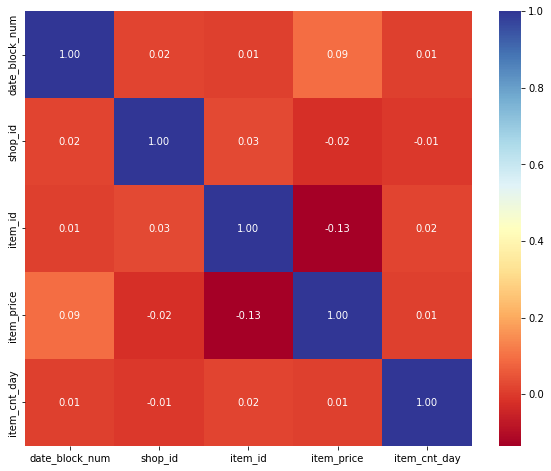

In [74]:
corr = data.corr()

fig, ax = plt.subplots(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(corr, cmap='RdYlBu', annot=True, fmt='.2f', ax=ax)

# Show the
plt.show()

In [ ]:
#ну это пушка 🤯🤯🤯🤯

In [75]:
data.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.928199e+06,2.928199e+06,2.928199e+06,2.928199e+06,2.928199e+06
mean,1.456936e+01,3.300343e+01,1.020036e+04,8.880529e+02,1.248195e+00
std,9.422817e+00,1.622529e+01,6.324573e+03,1.719829e+03,2.619217e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.477000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.355000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.569200e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [76]:
data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,06.01.2013,0,25,2554,1709.05,1.0
3,15.01.2013,0,25,2555,1099.00,1.0
4,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2928194,10.10.2015,33,25,7409,299.00,1.0
2928195,09.10.2015,33,25,7460,299.00,1.0
2928196,14.10.2015,33,25,7459,349.00,1.0
2928197,22.10.2015,33,25,7440,299.00,1.0


In [77]:
#group periods

# Convert the 'Date' column to datetime data type
data['date'] = pd.to_datetime(data.date, format='%d.%m.%Y')

# Extract the year, month, and day
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day

data.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'Year', 'Month', 'Day'],
      dtype='object')

In [78]:
data.Year.value_counts()
data.Month.value_counts()
data.Day.value_counts()

2013    1264390
2014    1053129
2015     610680
Name: Year, dtype: int64

1     302515
3     283328
12    273343
2     269446
8     247828
6     236895
7     234312
4     227725
10    226459
5     224355
9     219273
11    182720
Name: Month, dtype: int64

2     103071
7     102055
23    101109
22    101102
8     100711
21     99990
28     99565
27     98726
3      98713
6      97800
30     97198
20     96765
26     95887
5      95150
19     94704
4      94187
1      94174
25     93218
24     93107
16     92621
15     92391
17     92192
12     92091
14     91832
9      91773
13     90770
29     90701
18     90384
10     89828
11     88955
31     67429
Name: Day, dtype: int64

есть явный дизбаланс от 15 года

In [79]:
year_df = data.copy(deep=True)
p_year_patterns = data.groupby(['Month', 'Year', 'Day']).agg({
    'item_price': 'sum',
    'item_id': 'count',
}).reset_index()

Text(0.5, 1.0, 'Day')

Text(0.5, 1.0, 'item_price')

Text(0.5, 1.0, 'item_id')

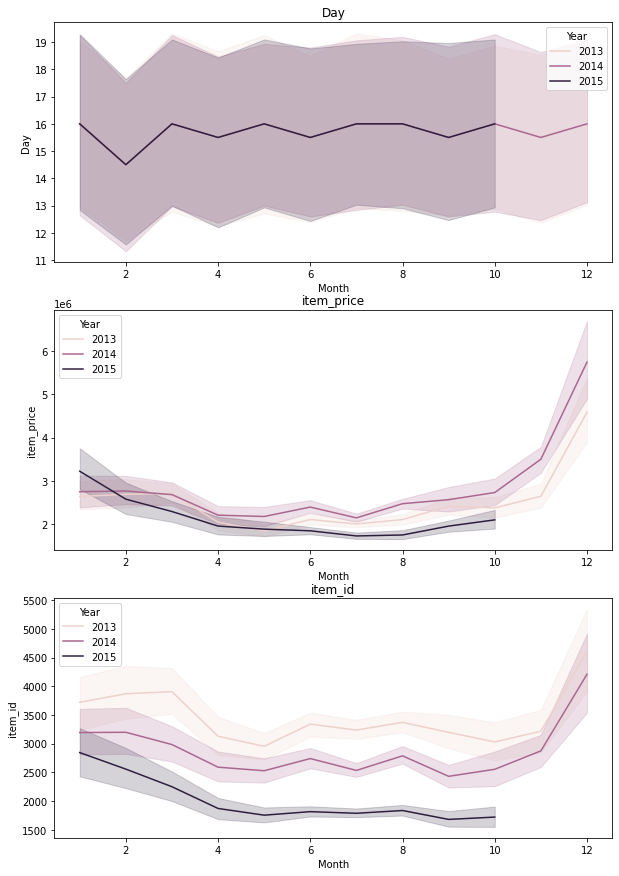

In [80]:
fig, axs = plt.subplots(len(p_year_patterns.columns) - 2, 1, figsize=(10, (len(p_year_patterns.columns) - 2) * 5))
    
for idx, col in enumerate(p_year_patterns.columns[2:]):
    sns.lineplot(data=p_year_patterns, x='Month', y=col, hue='Year', ax=axs[idx]).set_title(f"{col}")

very strange cut at 15 for 10-12

Text(0.5, 1.0, 'item_id - dynamic in January')

Text(0.5, 1.0, 'item_id - dynamic in February')

Text(0.5, 1.0, 'item_id - dynamic in March')

Text(0.5, 1.0, 'item_id - dynamic in April')

Text(0.5, 1.0, 'item_id - dynamic in May')

Text(0.5, 1.0, 'item_id - dynamic in June')

Text(0.5, 1.0, 'item_id - dynamic in July')

Text(0.5, 1.0, 'item_id - dynamic in August')

Text(0.5, 1.0, 'item_id - dynamic in September')

Text(0.5, 1.0, 'item_id - dynamic in October')

Text(0.5, 1.0, 'item_id - dynamic in November')

Text(0.5, 1.0, 'item_id - dynamic in December')

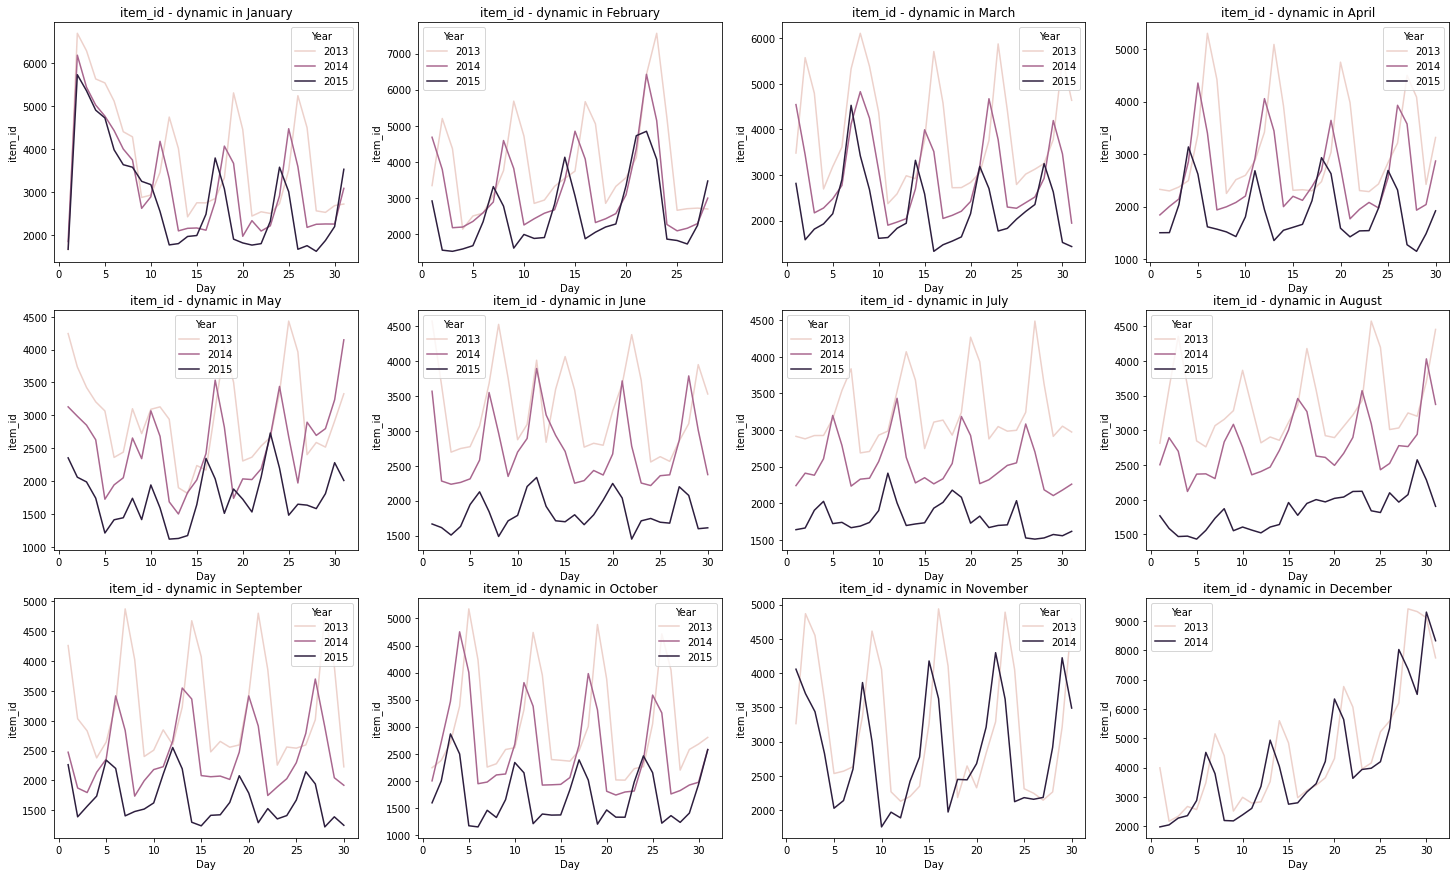

In [81]:
import calendar


p_year_patterns = data.groupby(['Day', 'Month', 'Year']).agg({
    'item_id': 'count',
}).reset_index()

fig, axs = plt.subplots(3, 4, figsize=(25, 15))
    
for month in range(1,13):
    sns.lineplot(data=p_year_patterns[p_year_patterns.Month == month], x='Day', y='item_id', hue='Year', ax=axs[(month - 1) // 4][(month - 1) % 4]).set_title(f"{col} - dynamic in {calendar.month_name[month]}")

Вообще нет данных для 15 года в ноябре и декабре

В целом зависимости выглядят нормально, можно заметить некоторую переодичность в продажах

но есть неоднозначные моменты(5-15 Января 15 года), которые мб стоит рассмотреть

/home/siarhei/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


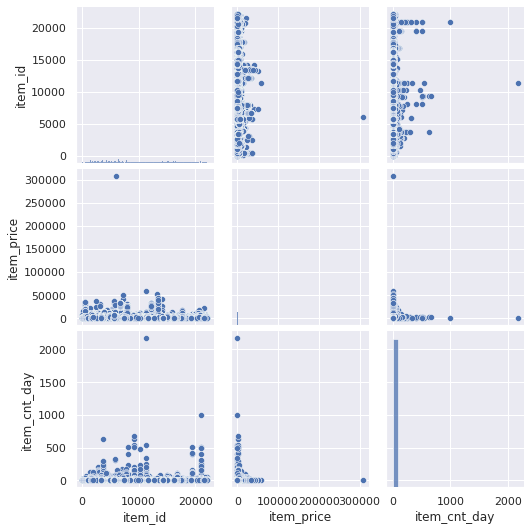

In [84]:
#scatterplot
sns.set()
cols = ['item_id','item_price','item_cnt_day']
sns.pairplot(data[cols], height = 2.5)
plt.show();

?Возможно стоит посмотреть зависимости между продажами и ценой?

## Feature engineering(norm in eda ?)

новые фичи:
    1. Город
    2. Тип магаза(ТЦ, ТРЦ и тд)
    3. Типа товара(Аксессуары, Билеты и тд)
Не уверен, что иммет смысл это делать(после onehot даст слишком много параметров)

In [ ]:
#Посмотрим продажи по 15 наиболее популярным точкам
data['shop_id'].value_counts()[:15]

Явно выделяются первые 7 магазинов(>100к). Посмотрим что они продают чаще всего

In [ ]:
top_7_shops = data['shop_id'].value_counts()[:7]

In [ ]:
def get_items(shop_id=None):
    items = data['shop_id'].value_counts()
    items = data.iloc[np.where(data['shop_id'] == shop_id)].item_id.value_counts()
    return items

In [ ]:
first_shop = get_items(top_7_shops.index[0])
first_shop_df = first_shop.to_frame()

In [ ]:
item_names=[]
for indx in first_shop.index:
    item_names.append(items.iloc[np.where(items.item_id == indx)].item_name)

In [ ]:
items.item_id

In [ ]:
items.iloc[np.where(items.item_id == 20949)].item_name

In [ ]:
first_shop